In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import torch

from netam import pretrained

A "crepe" is a lightweight wrapper around a model. 
For the end-user this will be the way that you interact with models.

To get a pretrained crepe, just ask for it by name. 🍰!

Here we get the `ThriftyHumV0.2-45` model:

In [2]:
crepe = pretrained.load("ThriftyHumV0.2-45")

Loading model ThriftyHumV0.2-45
Using cached models: /home/wdumm/dnsm-netam-proj-runner1/netam/netam/_pretrained/thrifty-0.2.0.zip


In [3]:
pcp_df = pd.read_csv("../data/wyatt-10x-1p5m_pcp_2023-11-30_NI.first100.csv.gz")

seqs = pcp_df.loc[:2, "parent_heavy"]
ratess, csp_logitss = crepe(seqs)

Here are some rate estimates for three sequences in a clonal family from the Jaffe et al. 10X data.

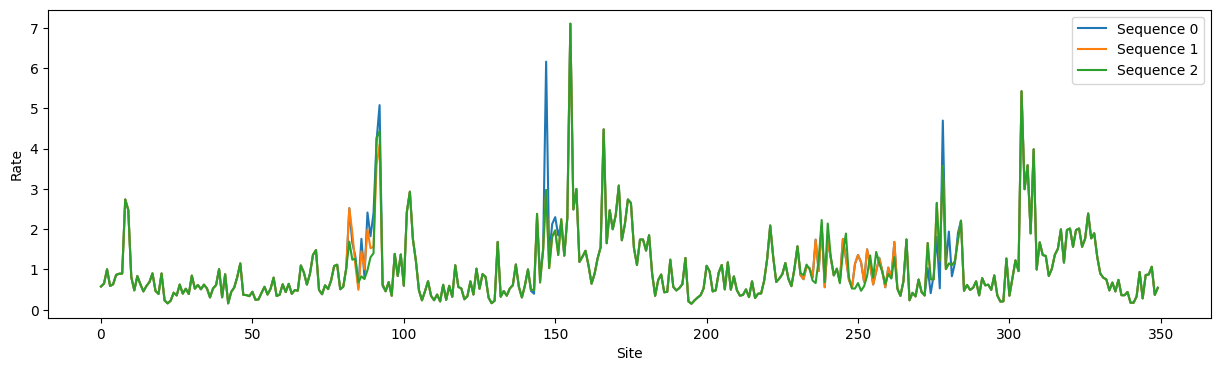

In [4]:
fig, ax = plt.subplots(figsize=(15, 4))
for i, rates in enumerate(ratess):
    ax.plot(rates[:350], label=f"Sequence {i}")
ax.set_xlabel("Site")
ax.set_ylabel("Rate")
ax.legend()

Now let's look at the conditional substitution probabilities (CSPs) for the three sequences. CSPs are the probabilities of observing a mutation to a particular base given that there is a mutation.

They are often called "substiution probabilities" but we like to use a more precise term to avoid confusion with other types of substitution probabilities.

The model supplies CSP logits. 
To get CSPs, we exponentiate the logits and normalize them to sum to 1 using the softmax function.

In [5]:
csps = torch.softmax(csp_logitss[0], dim=1)

Here's the sequence we'll be calculating CSPs for:

In [6]:
seqs[0]

'CAGGTGCAGCTGGTGGAGTCTGGGGGAGGCGTGGTCCAGCCTGGGAGGTCCCTGAGACTCTCCTGTGCAGCGTCTGGATTCACCTTCAGTAGCTCTGGCATGCACTGGGTCCGCCAGGCTCCAGGCAAGGGGCTGGAGTGGGTGGCAGTTATATGGTATGATGGAAGTAATAAATATTATGCAGACTCCGTGAAGGGCCGATTCACCATCTCCAGAGACAATTCCAAGAACACGGTGTATCTTCAAATGAACAGCCTAAGAGCCGAGGACACGGCTGTGTATTACTGTGCGAGAGAGGGGCACAGTAACTACCCCTACTACTACTACTACATGGACGTCTGGGGCAAAGGGACCACGGTCACCGTCTCCTCA'

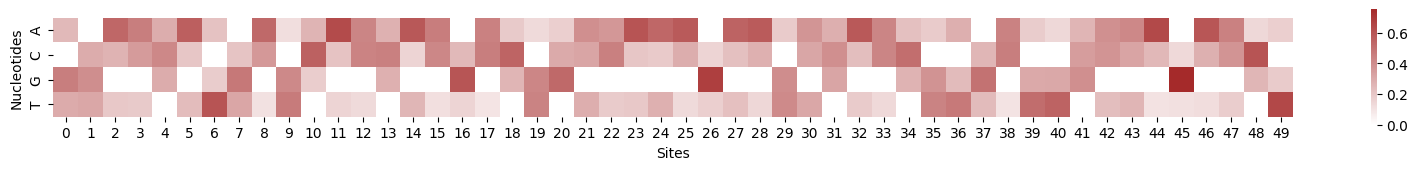

In [7]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("wbu", ["white", "brown"])

# Create a DataFrame for the first 50 sites:
df_csps = pd.DataFrame(csps[:50].T, index=["A", "C", "G", "T"])

plt.figure(figsize=(20, 3))
sns.heatmap(df_csps, annot=False, cmap=cmap, square=True, cbar_kws={"shrink": .5})

plt.xlabel("Sites")
plt.ylabel("Nucleotides")
plt.show()